<a href="https://colab.research.google.com/github/LuchoValr/Machine_Learning/blob/main/proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

Lectura de datos: Base de datos que contiene la tasa de homicidios a nivel global, junto con la localicacion, la region, subregion y año de la tasa de homicidios ademas del total. 

In [ ]:
crime = pd.read_csv('https://raw.githubusercontent.com/LuchoValr/Machine_Learning/main/Luis/countries-by-intentional-homicide-rate.csv')
crime.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


Al observar los datos podemos encontrar que estan completos

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


Creación de variables dummies por region y subregion para el modelamiento

In [ ]:
dumm = pd.get_dummies(crime[['Subregion', 'Region']])
dumm.head()

,"Subregion_Australia, New Zealand",Subregion_Caribbean,Subregion_Central America,Subregion_Central Asia,Subregion_Eastern Africa,Subregion_Eastern Asia,Subregion_Eastern Europe,Subregion_Middle Africa,Subregion_Northern Africa,Subregion_Northern America,...,Subregion_Southern Asia,Subregion_Southern Europe,Subregion_Western Africa,Subregion_Western Asia,Subregion_Western Europe,Region_Africa,Region_Americas,Region_Asia,Region_Europe,Region_Oceania
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


Juntamos las bases de datos

In [ ]:
crime_dumm = pd.concat([crime, dumm], axis = 1)
crime_dumm.head()

,Location,Region,Subregion,Rate,Count,Year,"Subregion_Australia, New Zealand",Subregion_Caribbean,Subregion_Central America,Subregion_Central Asia,...,Subregion_Southern Asia,Subregion_Southern Europe,Subregion_Western Africa,Subregion_Western Asia,Subregion_Western Europe,Region_Africa,Region_Americas,Region_Asia,Region_Europe,Region_Oceania
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,Albania,Europe,Southern Europe,2.1,61,2020,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,Algeria,Africa,Northern Africa,1.3,580,2020,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Andorra,Europe,Southern Europe,2.6,2,2020,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,Angola,Africa,Middle Africa,4.8,1217,2012,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
crime['Rate'].describe()

count    195.000000
mean       6.845128
std        9.600060
min        0.000000
25%        1.100000
50%        2.600000
75%        7.850000
max       49.300000
Name: Rate, dtype: float64

<Axes: xlabel='Region', ylabel='Rate'>

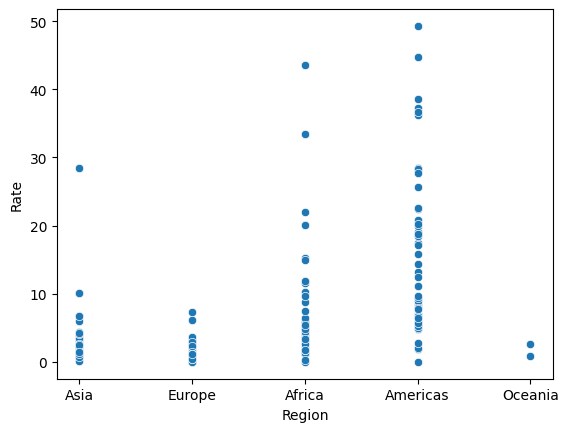

In [ ]:
sn.scatterplot(data = crime, x = 'Region', y = 'Rate')

La tasa es asimetrica

<Axes: xlabel='Rate', ylabel='Count'>

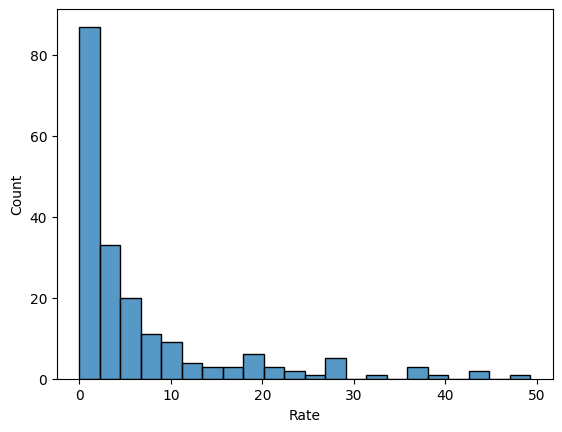

In [ ]:
sn.histplot(data=crime, x="Rate")

In [ ]:
crime_table = crime.copy()
table = crime_table.pivot_table(values = 'Count', index = 'Year', columns = 'Region')

<Axes: xlabel='Year'>

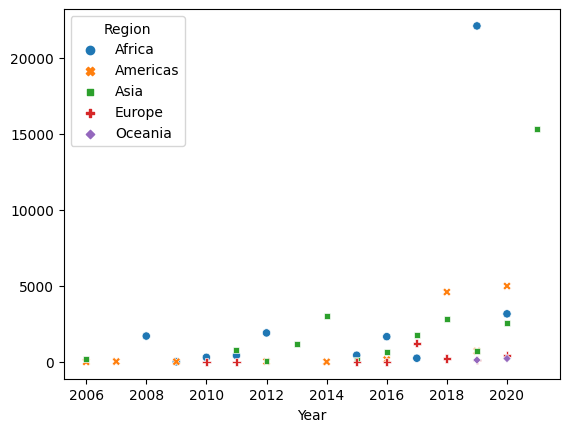

In [ ]:
sn.scatterplot(data = table)

Como vimos en la descripcion de la variable "Rate" la media de la tasa de homicidios global es 6.8 por lo que hacemos una variable que sera la variable de salida en donde es 1 cuando la tasa de homicidios es mayor o igual a la media

In [ ]:
crime_dumm['high_rate'] = np.where((crime.Rate>=6.8),1,0)
crime_dumm.head()

,Location,Region,Subregion,Rate,Count,Year,"Subregion_Australia, New Zealand",Subregion_Caribbean,Subregion_Central America,Subregion_Central Asia,...,Subregion_Southern Europe,Subregion_Western Africa,Subregion_Western Asia,Subregion_Western Europe,Region_Africa,Region_Americas,Region_Asia,Region_Europe,Region_Oceania,high_rate
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Albania,Europe,Southern Europe,2.1,61,2020,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,Algeria,Africa,Northern Africa,1.3,580,2020,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Andorra,Europe,Southern Europe,2.6,2,2020,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,Angola,Africa,Middle Africa,4.8,1217,2012,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Los homicidios estan mayormente concentrados en America

In [ ]:
table = crime_table.pivot_table('high_rate', 'Region')
table['% region'] = (table['high_rate']/table['high_rate'].sum())*100
table

,high_rate,% region
Region,,
Africa,0.300000,26.243568
Americas,0.745098,65.180103
Asia,0.078431,6.861063
Europe,0.019608,1.715266
Oceania,0.000000,0.000000


In [ ]:
crime_dumm = crime_dumm.drop(['Location', 'Region', 'Subregion', 'Rate'], axis = 1)
crime_dumm.head()

,Count,Year,"Subregion_Australia, New Zealand",Subregion_Caribbean,Subregion_Central America,Subregion_Central Asia,Subregion_Eastern Africa,Subregion_Eastern Asia,Subregion_Eastern Europe,Subregion_Middle Africa,...,Subregion_Southern Europe,Subregion_Western Africa,Subregion_Western Asia,Subregion_Western Europe,Region_Africa,Region_Americas,Region_Asia,Region_Europe,Region_Oceania,high_rate
0,2474,2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,61,2020,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,580,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2,2020,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1217,2012,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
crime_dumm = crime_dumm.astype(str)
crime_dumm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Count                             195 non-null    object
 1   Year                              195 non-null    object
 2   Subregion_Australia, New Zealand  195 non-null    object
 3   Subregion_Caribbean               195 non-null    object
 4   Subregion_Central America         195 non-null    object
 5   Subregion_Central Asia            195 non-null    object
 6   Subregion_Eastern Africa          195 non-null    object
 7   Subregion_Eastern Asia            195 non-null    object
 8   Subregion_Eastern Europe          195 non-null    object
 9   Subregion_Middle Africa           195 non-null    object
 10  Subregion_Northern Africa         195 non-null    object
 11  Subregion_Northern America        195 non-null    object
 12  Subregion_Northern Eur

In [ ]:
X = crime_dumm.iloc[:,:25]
Y = crime_dumm.iloc[:,26]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 0) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
arbol = DecisionTreeClassifier(max_depth = 8)

In [ ]:
arbol_data = arbol.fit(X_train, Y_train)

El arbol inicia por preguntarse si la tasa mayor a la media se encuentra en la region de America, como mencionamos antes esta region concentra la mayoria de los homicidios. Luego se divide en dos ramas para empezar a desglosar los nodos en subregiones, surafrica y norteamerica, surafrica tambien concentra una parte considerable de los homicidios. Por el lado de surafrica se desglosa en nodos donde se pregunta si nos encontramos en el oeste de asia y en el este Africano. Por el lado del este Africano se pregunta si la cuenta es menor o igual a 22.5 para al final tener por ultimo hojas con un gini completamente puro. Por el lado del oeste asiatico se desglosa hasta llegar a preguntarse si se encuentra en el sur asiatico para tener como resultado hojas con un gini puro.

A la derecha de la raiz se pregunta si se encuentra en norteamerica, desglosandose principalmente para llegar a nodos donde se pregunta si se encuentra en el Caribe y en suramerica. En ambos casos se pregunta por los años en los que se encuentra y la cuenta de homicidios para finalmente llegar a hojas con ginis puros, realizando una clasificacion satisfactoria. Mas que nada se pregunta por años del 2013, de lo que podemos inferir que desde este año hubo gran tasa de criminalidad.

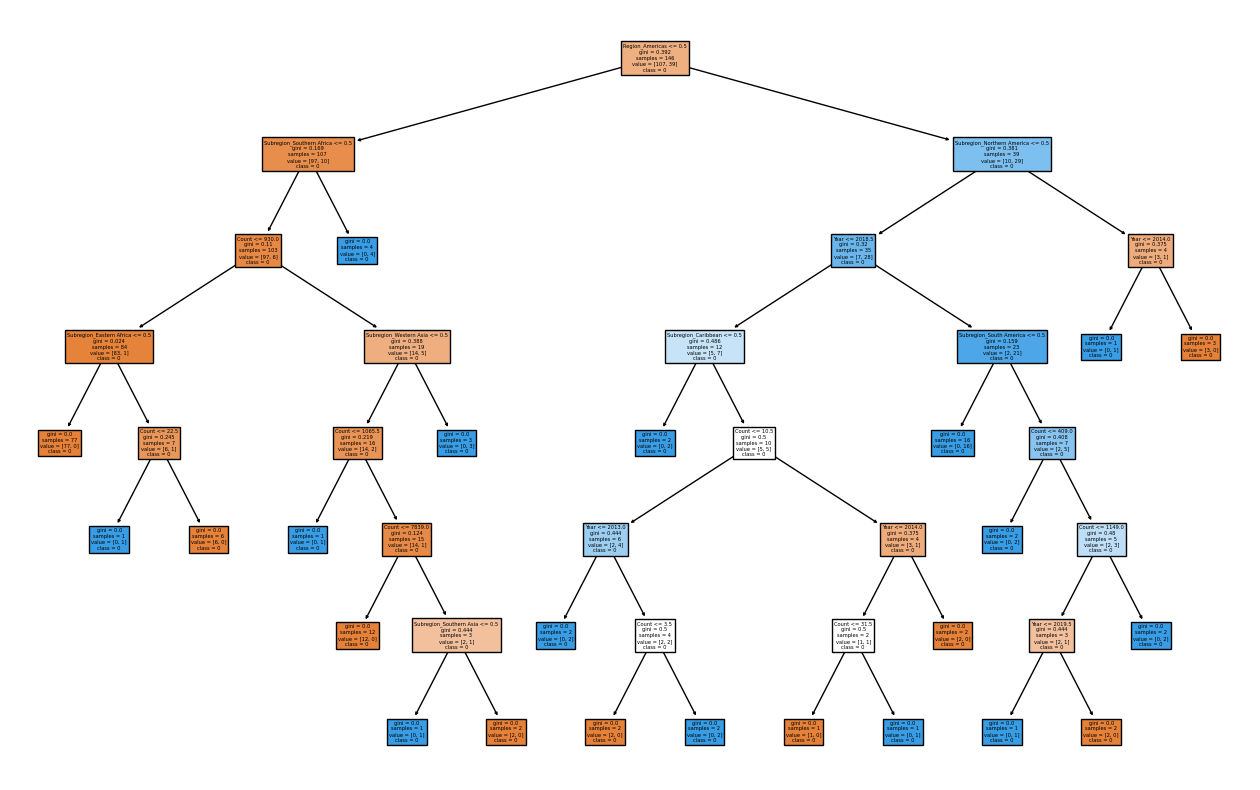

In [ ]:
fig = plt.figure(figsize = (16,10))
tree.plot_tree(arbol_data, feature_names = list(X.columns.values), class_names = list(Y.values), filled = True)
plt.show()

In [ ]:
Y_pred = arbol_data.predict(X_test)
Y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1',
       '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '0', '1', '1', '0', '0', '1', '0', '0', '1'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_de_confusion = confusion_matrix(Y_test, Y_pred)
matriz_de_confusion

array([[29,  4],
       [ 4, 12]])

Se obtuvo un 84% de presicion en el arbol de decision

In [ ]:
presicion_global = np.sum(matriz_de_confusion.diagonal())/np.sum(matriz_de_confusion)
presicion_global

0.8367346938775511